In [4]:
import torch

checkpoint = torch.load("checkpoints/stock_60_24_ns_Transformer_custom_ftMS_sl60_ll30_pl24_dm512_nh8_el3_dl2_df2048_fc3_ebtimeF_dtTrue_Exp_h64_l3_0/checkpoint.pth")
print(checkpoint)


OrderedDict({'enc_embedding.value_embedding.tokenConv.weight': tensor([[[ 0.0483, -0.3295,  0.1057],
         [-0.2277, -0.1881, -0.2030],
         [ 0.0537, -0.0745, -0.2134],
         ...,
         [-0.3274,  0.0065, -0.1106],
         [-0.1154,  0.1759, -0.1063],
         [-0.2636, -0.3678, -0.2280]],

        [[-0.2348, -0.1964,  0.3720],
         [ 0.1455,  0.1008, -0.0789],
         [ 0.1064, -0.3016,  0.3186],
         ...,
         [ 0.3869,  0.5177,  0.0513],
         [ 0.2019,  0.0761,  0.2563],
         [-0.0351,  0.2607,  0.0863]],

        [[ 0.0259, -0.1674,  0.2436],
         [-0.2131, -0.0703,  0.1798],
         [ 0.0194, -0.1790, -0.0689],
         ...,
         [ 0.4175,  0.0892, -0.0044],
         [-0.1219,  0.1339, -0.0960],
         [-0.1618,  0.5251, -0.0359]],

        ...,

        [[ 0.1141,  0.1974, -0.0467],
         [ 0.1341,  0.0355, -0.0905],
         [-0.0584,  0.3290, -0.0586],
         ...,
         [-0.0104,  0.1533,  0.1651],
         [-0.3407, -0.131

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Charger les résultats
folder_path = "results/stock_60_24_ns_Transformer_custom_ftMS_sl60_ll30_pl24_dm512_nh8_el3_dl2_df2048_fc3_ebtimeF_dtTrue_Exp_h64_l3_0/"

true_values = np.load(folder_path + "true.npy")
predictions = np.load(folder_path + "pred.npy")
metrics = np.load(folder_path + "metrics.npy")
print(metrics)
name = np.array(["mae", "mse", "rmse", "mape", "mspe"])


[  0.67664117   2.3263137    1.5252258    3.1271389  213.02077   ]


In [6]:
print(predictions)

[[[0.6427524 ]
  [0.64275193]
  [0.64275205]
  ...
  [0.64275205]
  [0.6427522 ]
  [0.6427522 ]]

 [[0.6329385 ]
  [0.632939  ]
  [0.6329383 ]
  ...
  [0.6329388 ]
  [0.63293856]
  [0.6329388 ]]

 [[0.68016523]
  [0.6801652 ]
  [0.6801655 ]
  ...
  [0.6801653 ]
  [0.68016523]
  [0.6801652 ]]

 ...

 [[0.09766226]
  [0.09766222]
  [0.0976622 ]
  ...
  [0.09766226]
  [0.0976622 ]
  [0.09766224]]

 [[0.09738228]
  [0.09738224]
  [0.09738219]
  ...
  [0.09738217]
  [0.09738221]
  [0.09738222]]

 [[0.10396267]
  [0.10396267]
  [0.10396269]
  ...
  [0.10396271]
  [0.10396265]
  [0.10396266]]]


In [7]:
print(true_values.shape)
print(predictions.shape)

(635, 24, 1)
(635, 24, 1)


In [8]:
import pandas as pd

dtest = pd.DataFrame([name, metrics])
print(dtest)


          0         1         2         3           4
0       mae       mse      rmse      mape        mspe
1  0.676641  2.326314  1.525226  3.127139  213.020767


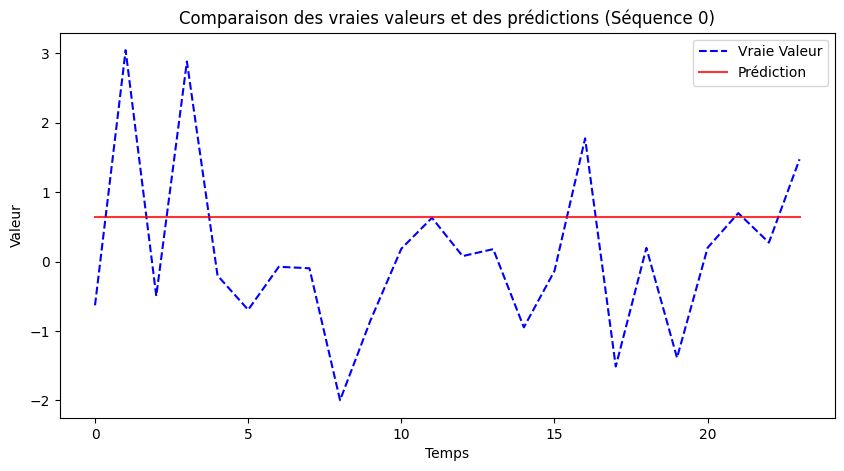

In [9]:
import numpy as np
import matplotlib.pyplot as plt

# Sélectionner un exemple de série temporelle (par exemple, la première séquence testée)
index = 0  # Tu peux changer cet index pour voir d'autres séquences
true_series = true_values[index, :, 0]  # Première variable (colonne 0)
pred_series = predictions[index, :, 0]  # Première variable (colonne 0)

# Affichage
plt.figure(figsize=(10, 5))
plt.plot(true_series, label="Vraie Valeur", linestyle="dashed", color="blue")
plt.plot(pred_series, label="Prédiction", color="red", alpha=0.8)
plt.legend()
plt.title(f"Comparaison des vraies valeurs et des prédictions (Séquence {index})")
plt.xlabel("Temps")
plt.ylabel("Valeur")
plt.show()


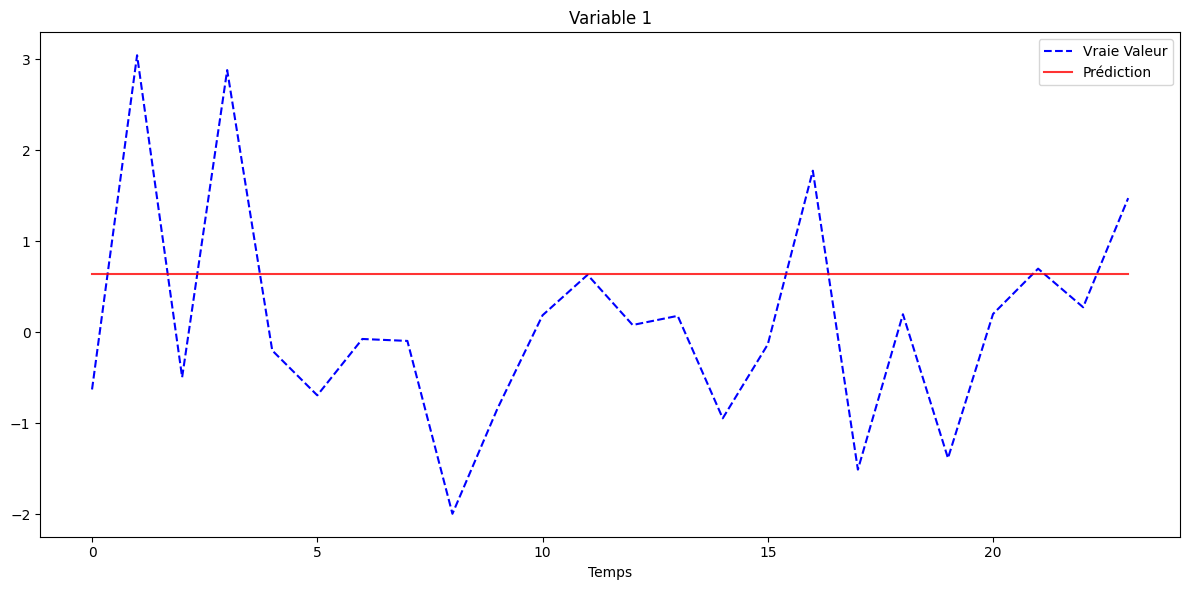

In [10]:
num_vars = 1  # Nombre de variables à afficher

plt.figure(figsize=(12, 6))
for i in range(num_vars):
    plt.subplot(num_vars, 1, i + 1)
    plt.plot(true_values[index, :, i], label="Vraie Valeur", linestyle="dashed", color="blue")
    plt.plot(predictions[index, :, i], label="Prédiction", color="red", alpha=0.8)
    plt.legend()
    plt.title(f"Variable {i+1}")

plt.xlabel("Temps")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
data = pd.read_csv("./dataset/exchange_rate/exchange_rate.csv")
data2 = pd.read_csv("./dataset/stock_var/stock.csv")
print(data.dtypes)
print(data2.dtypes)

date     object
0       float64
1       float64
2       float64
3       float64
4       float64
5       float64
6       float64
OT      float64
dtype: object
date      object
AAPL     float64
GOOGL    float64
OT       float64
dtype: object
